In [113]:
import pandas as pd

df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")

C:\Users\school\AppData\Local\Temp\ipykernel_26448\2192911794.py:3: DtypeWarning: Columns (2,3,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("hf://datasets/ailsntua/Chordonomicon/chordonomicon_v2.csv")


In [114]:
df.columns

Index(['id', 'chords', 'release_date', 'genres', 'decade', 'rock_genre',
       'artist_id', 'main_genre', 'spotify_song_id', 'spotify_artist_id'],
      dtype='object')

In [131]:
# convert release_date to datetime and keep only rows after 2015-01-01
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)
cutoff = pd.Timestamp('2015-01-01')
df = df[df['release_date'] > cutoff].reset_index(drop=True)

# quick sanity check
print(f'Rows after {cutoff.date()}:', len(df))
print('Date range:', df['release_date'].min(), 'to', df['release_date'].max())

C:\Users\school\AppData\Local\Temp\ipykernel_26448\3158674205.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce', infer_datetime_format=True)


Rows after 2015-01-01: 180411
Date range: 2015-01-02 00:00:00 to 2023-11-18 00:00:00


In [132]:
rnb_df = df[df['genres'].str.contains('r&b', case=False, na=False)]


In [133]:
rnb_df.head()

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg


In [134]:
rnb_df_first_ten = rnb_df.head(100)

In [135]:
rnb_df_first_ten

,id,chords,release_date,genres,decade,rock_genre,artist_id,main_genre,spotify_song_id,spotify_artist_id
42,76,<intro_1> Ebmaj7 F Bbmaj7 Gmin7 <verse_1> Ebma...,2023-04-07,'canadian contemporary r&b',2020.0,NaN,artist_59,soul,3ym8ajVmKm6Fybgov3WBI5,20wkVLutqVOYrc0kxFs7rA
50,92,<verse_1> Amin C E E7 Amin C E E7 Amin C E E7 ...,2022-10-14,'dark r&b',2020.0,NaN,artist_75,soul,62rXTgGmOsUBiIr10BHlTw,3AYZMgvmzNKc3cGmJUSITh
128,209,<intro_1> Fmin Bbmin Eb <verse_1> Fmin Bbmin E...,2022-10-21,'bedroom r&b',2020.0,NaN,artist_126,soul,3eVoB50kvcFMkQ5Gs4naQc,1pmY5q8eybXnnrwOEFqQ1M
162,285,<verse_1> C Dmin Amin Cmaj7 C Amin A Amin7 Fma...,2015-06-09,'canadian pop' 'contemporary r&b' 'hip pop' 'r...,2010.0,NaN,artist_172,pop,1C18fJEsSR0hpRxMzRQCrA,0le01dl1WllSHhjEXRl4in
174,322,<verse_1> C Amin C Amin Dmin7 F G <chorus_1> C...,2023-02-10,'r&b',2020.0,NaN,artist_195,soul,0OdRKPM36edHZ8OEpbrDCu,30DhU7BDmF4PH0JVhu8ZRg
...,...,...,...,...,...,...,...,...,...,...
5699,11739,<intro_1> Cmin7 <verse_1> Dmin7 Gmin7 Cmin7 Dm...,2022-12-09,'pop' 'r&b' 'rap',2020.0,NaN,artist_6486,pop,5xMw6qCcpd2gBXPGTegC4W,7tYKF4w9nC0nq9CsPZTHyP
5702,11743,<intro_1> Fmaj7 Gmaj7 Fmaj7 Gmaj7 <verse_1> Fm...,2022-12-09,'pop' 'r&b' 'rap',2020.0,NaN,artist_6486,pop,2CSRrnOEELmhpq8iaAi9cd,7tYKF4w9nC0nq9CsPZTHyP
5705,11763,<intro_1> Dmin7 Amin7 <verse_1> Dmin7 Amin7 Dm...,2022-12-09,'pop' 'r&b' 'rap',2020.0,NaN,artist_6486,pop,1eIXYZWEfJO3Na2LCCnIJE,7tYKF4w9nC0nq9CsPZTHyP
5745,11912,<intro_1> Dmin7 Bb F C Dmin Bb Dmin7 Bb F Dmin...,2015-07-22,'uk contemporary r&b',2010.0,NaN,artist_6303,soul,5ldyAFx6EaPRi9vw9GgUNf,0AepkoQhYvkjEzzwIcGxdV


In [136]:
import pickle, music21, re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [137]:
import re

# Function to normalize chords to music21 format
def normalize_music21_chord(ch):
    if not ch:
        return None

    # Normalize flats and sharps
    ch = ch.replace('b', '-')   # b → - for flats
    ch = ch.replace('#', '#')   # keep sharps
    ch = ch.replace('min7', 'm7')  # minor 7
    ch = ch.replace('min', 'm')    # minor
    ch = ch.replace('M7', 'maj7')  # major 7
    ch = ch.replace('dim6', 'dim') # dim6 → dim
    ch = ch.replace('aug', 'aug')  # keep aug
    ch = ch.replace('sus', 'sus')  # keep sus

    # Fix Bbm, Ebm etc. → B-m, E-m
    ch = re.sub(r'^([A-G])-?m$', r'\1-m', ch)

    # Fix slash chords: ensure root and bass are uppercase
    if '/' in ch:
        parts = ch.split('/')
        root = parts[0].capitalize()
        bass = parts[1].capitalize()
        ch = f'{root}/{bass}'

    # Capitalize root letter for any chord
    m = re.match(r'^([A-Ga-g])([-#]?)(.*)$', ch)
    if m:
        root, accidental, rest = m.groups()
        ch = root.upper() + accidental + rest

    return ch

# Normalize all sequences
first_ten_sequence_normalized = []

# Make sure each entry in rnb_df_first_ten['chords'] is a list of chords
for row in rnb_df_first_ten['chords']:
    if not row:  # skip empty
        first_ten_sequence_normalized.append([])
        continue

    # If the row is a string, split into individual chords (adjust regex if needed)
    if isinstance(row, str):
        # Split based on uppercase letters followed by optional accidentals and chord types
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', row)
    else:
        chords = row  # already a list

    # Normalize each chord
    new_song = [normalize_music21_chord(ch) for ch in chords if ch]
    first_ten_sequence_normalized.append(new_song)

# Example: get states
states = set()
for song in first_ten_sequence_normalized:
    states |= set(song)
states = list(states)

print('Normalized first sequence example:', first_ten_sequence_normalized[0])
print('States:', states)


Normalized first sequence example: ['E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'B', 'G-m', 'E', 'F', 'Bmaj7', 'G-m', 'C-m', 'F', 'G-m', 'E-m']
States: ['E9', 'Bmaj7', 'C-m', 'Asus4', 'C/B', 'E', 'Emaj7', 'A/B', 'Dsus2/B', 'C/E', 'C7', 'Bsus4', 'D/A', 'Fmaj7', 'G/A', 'G7', 'A7', 'D7', 'G-m', 'Bdim', 'Cmaj7', 'G7/D', 'Dmaj7', 'Dsus2/G', 'F', 'C', 'Dsus2/C', 'E-m', 'F-m', 'D', 'Asus2', 'B', 'G13', 'Amaj7', 'G', 'B-m', 'Esus4', 'Dsus2', 'E7/D', 'Gsus4', 'F/A', 'B7', 'D/E', 'E/F', 'A-m', 'A/C', 'F7', 'Adim', 'E7', 'Gsus2', 'D-m', 'Gmaj7', 'A', 'Dmaj7/F']


In [138]:
stream = music21.stream.Stream()
for chord_symbol in states:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)  
    stream.append(chord)
stream.write('midi', fp='music.mid')
stream.show('midi')  



In [139]:
import music21
import re

# get the 6th row (row number 5, 0-based)
chord_sequence = rnb_df_first_ten.iloc[3]['chords']

# if it's a string of chords, split it properly
if isinstance(chord_sequence, str):
    chord_sequence = re.findall(
        r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?',
        chord_sequence
    )

# normalize using your function
chord_sequence = [normalize_music21_chord(ch) for ch in chord_sequence if ch]

# make the stream
stream = music21.stream.Stream()
for chord_symbol in chord_sequence:
    try:
        chord = music21.harmony.ChordSymbol(chord_symbol)
        chord.duration = music21.duration.Duration(2.0)
        stream.append(chord)
    except Exception as e:
        print(f"Skipping {chord_symbol}: {e}")

# write and play
stream.write('midi', fp='music.mid')
stream.show('midi')


In [140]:
first_ten_songs = rnb_df_first_ten["chords"]

In [141]:
S = len(states)
state2idx = {s: i for i, s in enumerate(states)}
tr_counts = np.zeros((S, S), dtype=float)  # rows = from, cols = to (we'll choose rows-from)

for song in first_ten_songs:
    # make sure song is iterable of chords
    if not song or len(song) < 2:
        continue

    # if song is a string, split into chord tokens and normalize
    if isinstance(song, str):
        chords = re.findall(r'[A-G][#-]?(?:maj7|m7|m|dim7|dim|aug|sus2|sus4|7|9|13)?(?:/[A-G][#-]?)?', song)
        chords = [normalize_music21_chord(ch) for ch in chords if ch]
    else:
        chords = song

    # count transitions, skipping chords not in our state index to avoid KeyError
    for t in range(1, len(chords)):
        frm = chords[t - 1]
        to = chords[t]
        if frm not in state2idx or to not in state2idx:
            # skip unknown or malformed tokens (e.g., stray 'm')
            continue
        i = state2idx[frm]
        j = state2idx[to]
        tr_counts[i, j] += 1  # row = from, col = to (intuitive)

# Build DataFrame for readable inspection
print('Transition Counts:\n', tr_counts)

Transition Counts:
 [[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  5.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  2. 30. ...  1.  6.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [142]:

# Sum the transition counts by row:
sums = tr_counts.sum(axis=1, keepdims=True)
print('State proportions: \n', sums)

State proportions: 
 [[ 14.]
 [ 24.]
 [148.]
 [ 12.]
 [  4.]
 [379.]
 [ 10.]
 [ 14.]
 [  3.]
 [ 11.]
 [  3.]
 [  1.]
 [ 14.]
 [228.]
 [  1.]
 [ 39.]
 [ 23.]
 [134.]
 [241.]
 [ 11.]
 [ 62.]
 [  0.]
 [ 17.]
 [  1.]
 [626.]
 [816.]
 [  2.]
 [459.]
 [ 47.]
 [457.]
 [ 18.]
 [439.]
 [  1.]
 [ 21.]
 [731.]
 [354.]
 [  8.]
 [ 33.]
 [ 10.]
 [  3.]
 [  1.]
 [ 27.]
 [  1.]
 [  8.]
 [657.]
 [  1.]
 [  2.]
 [  2.]
 [ 94.]
 [  2.]
 [481.]
 [ 91.]
 [572.]
 [ 16.]]


In [143]:
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)
print('Transition Proportions:\n', tr_pr)

Transition Proportions:
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.04166667 0.        ]
 [0.         0.         0.         ... 0.         0.03378378 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0034965  0.05244755 ... 0.00174825 0.01048951 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [144]:
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

           E9  Bmaj7   C-m  Asus4  C/B     E  Emaj7   A/B  Dsus2/B   C/E  ...  \
E9       0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
Bmaj7    0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
C-m      0.00   0.00  0.00   0.00  0.0  0.21   0.00  0.00     0.00  0.00  ...   
Asus4    0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
C/B      0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
E        0.00   0.01  0.00   0.00  0.0  0.01   0.00  0.04     0.00  0.00  ...   
Emaj7    0.00   0.00  0.00   0.00  0.0  0.10   0.00  0.00     0.00  0.00  ...   
A/B      0.00   0.00  0.00   0.00  0.0  0.07   0.00  0.00     0.00  0.00  ...   
Dsus2/B  0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
C/E      0.00   0.00  0.00   0.00  0.0  0.00   0.00  0.00     0.00  0.00  ...   
C7       0.00   0.00  0.00   0.00  0.0  0.33   0.00  0.00     0.00  0.00  ...   
Bsus4    0.00   0.00  0.00  

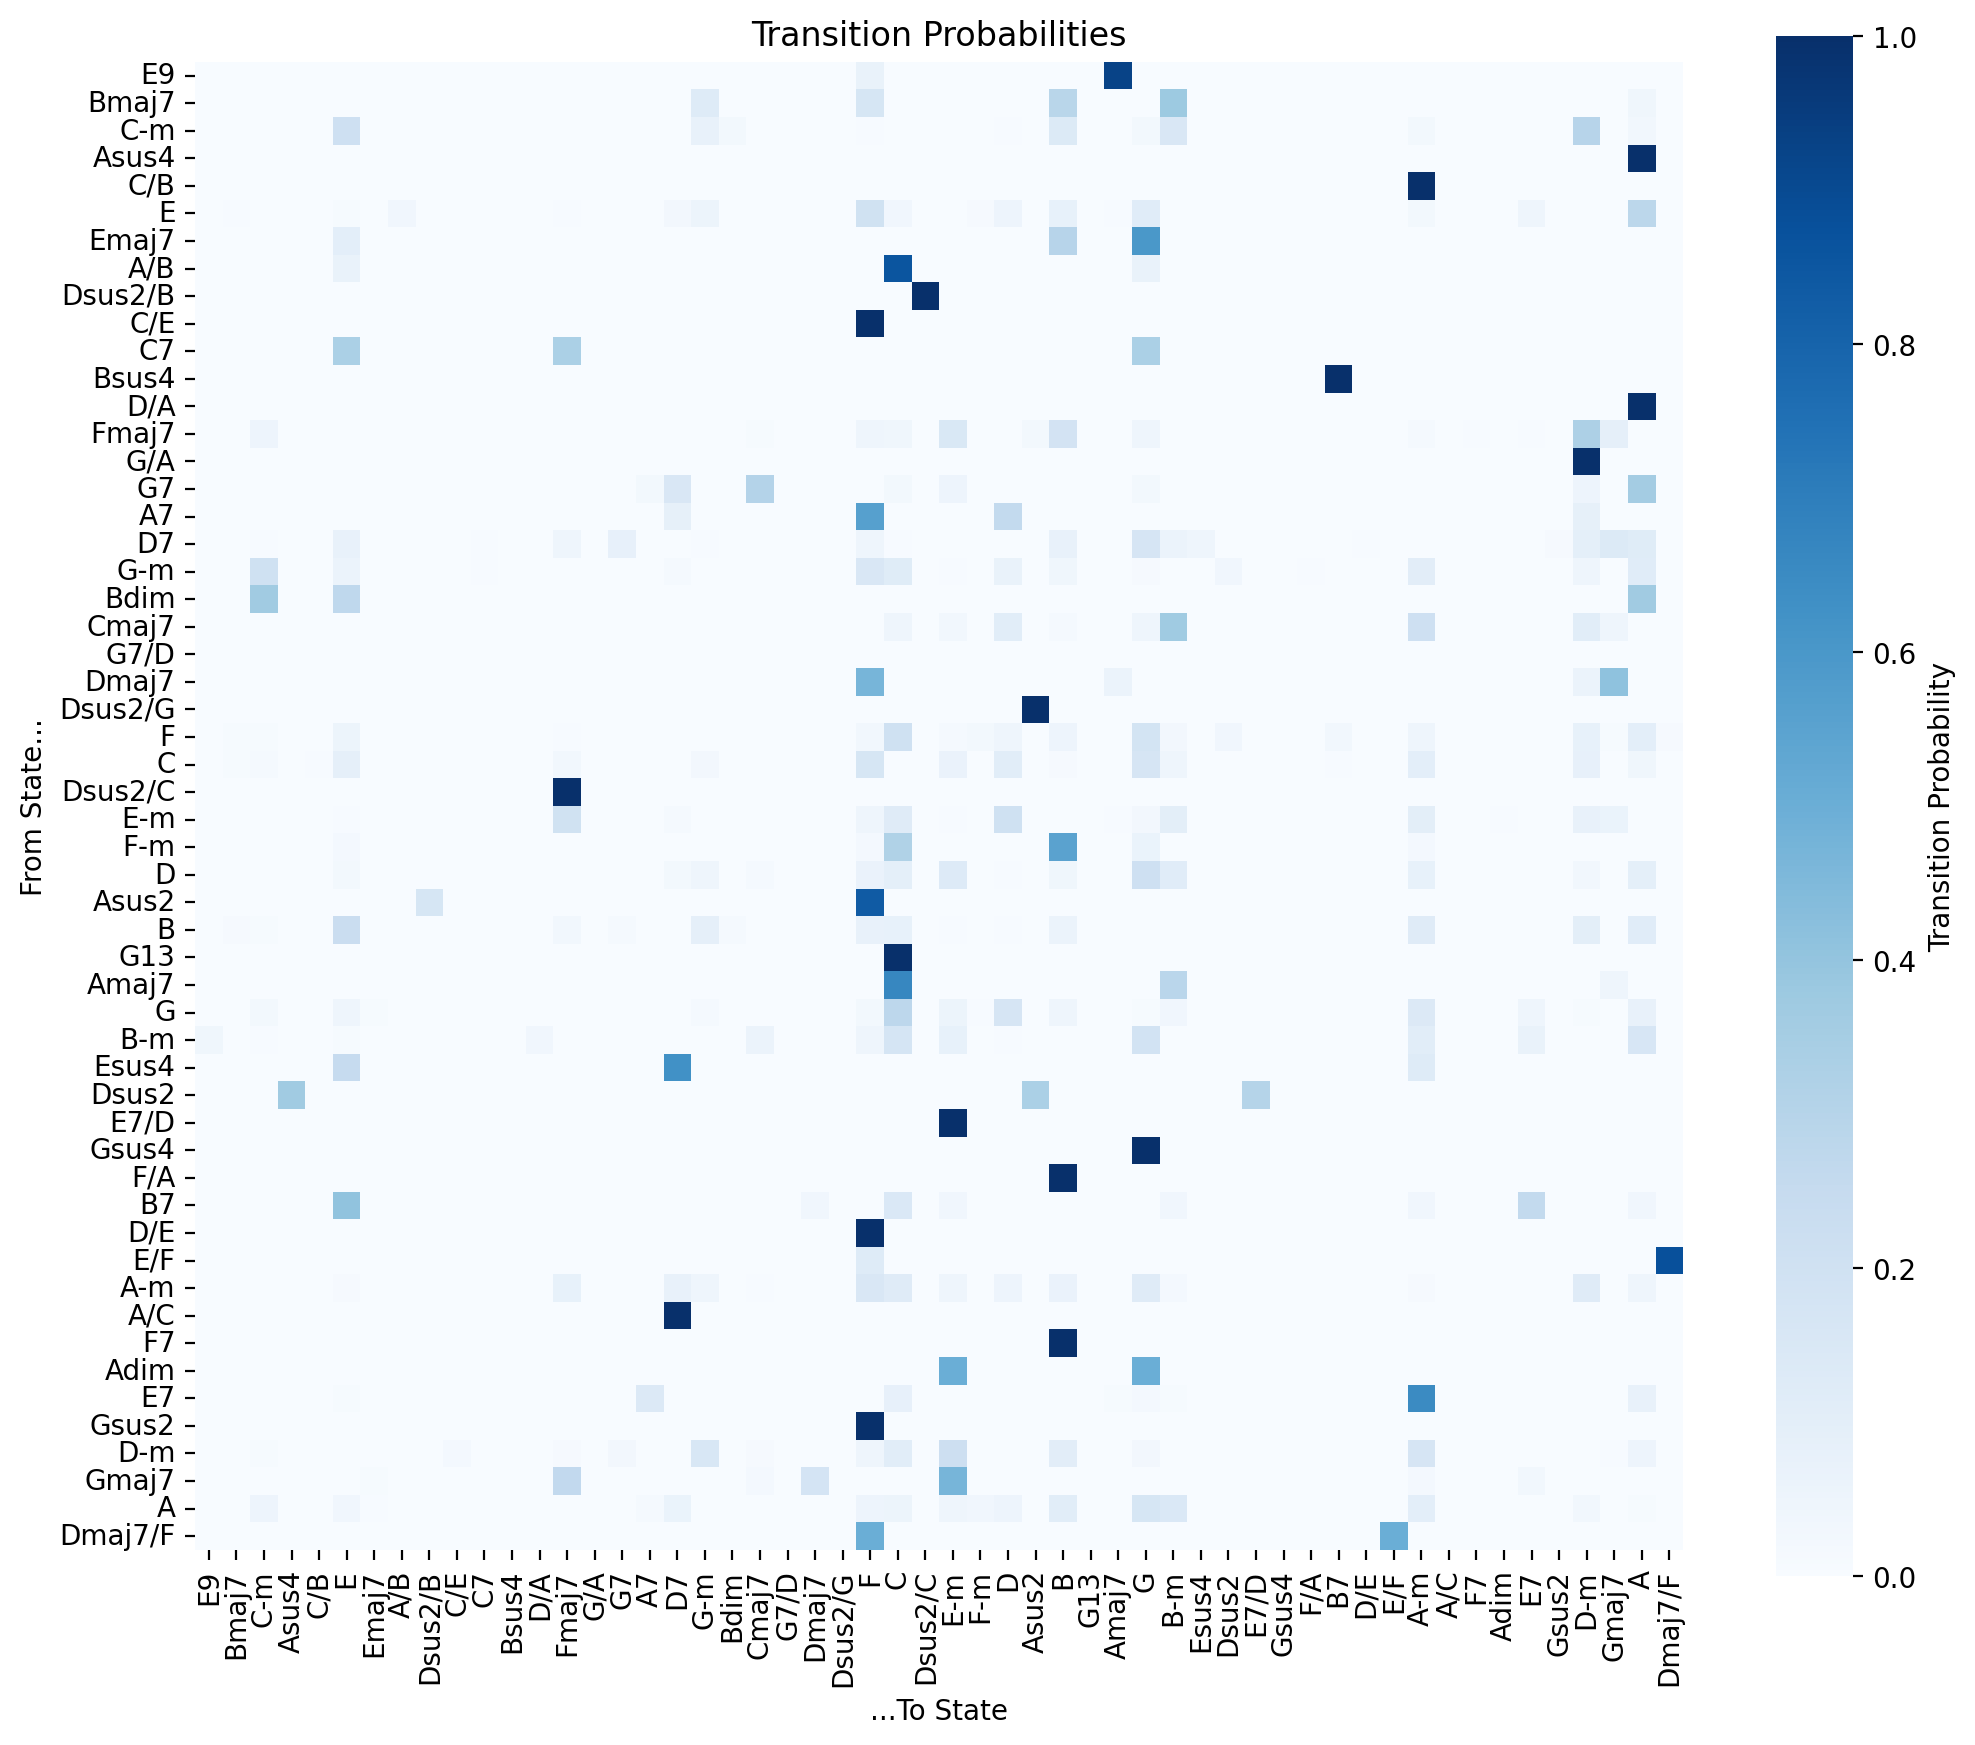

In [145]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [146]:
import numpy as np
import music21

random_pr = 0.5  # not used here, can delete or keep as concept
np.random.seed(100)

initial_state = np.random.choice(states)
print(f'Initial state: {initial_state}')

n_sim = 20
simulation = [initial_state]

for t in range(n_sim - 1):
    next_state = np.random.choice(states)  # pick random chord uniformly
    simulation.append(next_state)

print(simulation)

# Convert to chord symbols for playback
stream = music21.stream.Stream()
for chord_symbol in simulation:
    chord = music21.harmony.ChordSymbol(chord_symbol)
    chord.duration = music21.duration.Duration(2.0)
    stream.append(chord)

stream.write('midi', fp='music.mid')
stream.show('midi')


Initial state: Dsus2/B
[np.str_('Dsus2/B'), np.str_('F'), np.str_('Asus4'), np.str_('Gsus4'), np.str_('Dsus2/G'), np.str_('G7'), np.str_('E7'), np.str_('C7'), np.str_('Asus2'), np.str_('A'), np.str_('G'), np.str_('Dmaj7/F'), np.str_('C-m'), np.str_('G'), np.str_('G/A'), np.str_('G'), np.str_('Gsus2'), np.str_('E7'), np.str_('F'), np.str_('G7')]
